In [71]:
#Import required libs
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mp
import matplotlib 
import numpy as np
%matplotlib inline

In [72]:
# Read data and load as dataframe
df_master = pd.read_csv('data/zomato.csv' , encoding='latin-1')
df_country = pd.read_excel('data/Country-Code.xlsx')

In [73]:
df_master.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [74]:
df_country.columns

Index(['Country Code', 'Country'], dtype='object')

In [75]:
df = pd.merge(df_master,df_country, on='Country Code', how='left')
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x241ba7ad4d0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

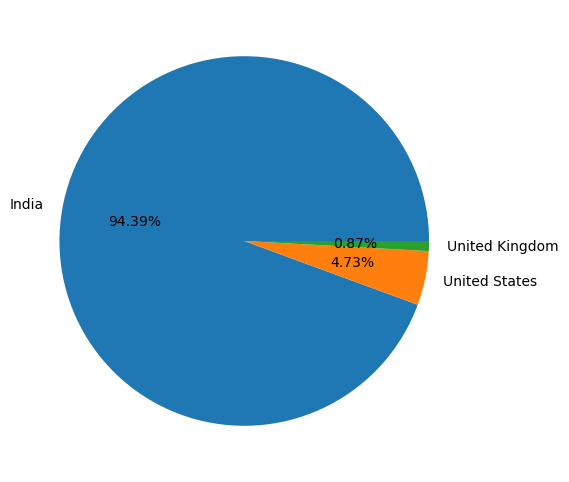

In [76]:
country_index =  df.Country.value_counts().index
country_value =  df.Country.value_counts().values
mp.pie(country_value[:3], labels=country_index[:3], autopct='%1.2f%%')

In [77]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [78]:
# Online Coutries
df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index().rename(columns={0: "Count"})

,Has Online delivery,Country,Count
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


In [79]:
# Top Cusines
df.Cuisines.value_counts().head(5).reset_index()

,index,Cuisines
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

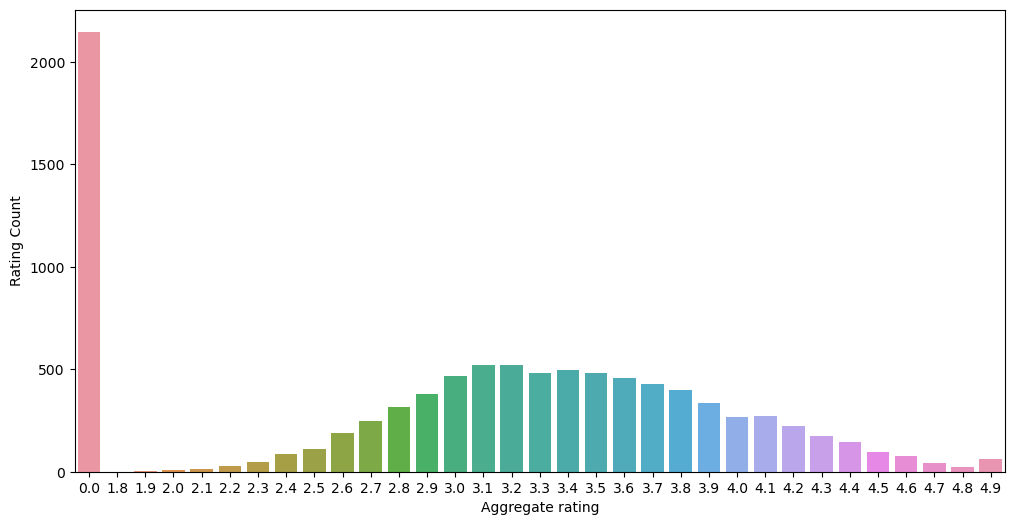

In [80]:
rating_df = df[['Aggregate rating', 'Rating color', 'Rating text']].groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0: 'Rating Count'})
#rating_df
matplotlib.rcParams['figure.figsize'] = (12,6)
sb.barplot(x="Aggregate rating",y="Rating Count",data=rating_df)

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

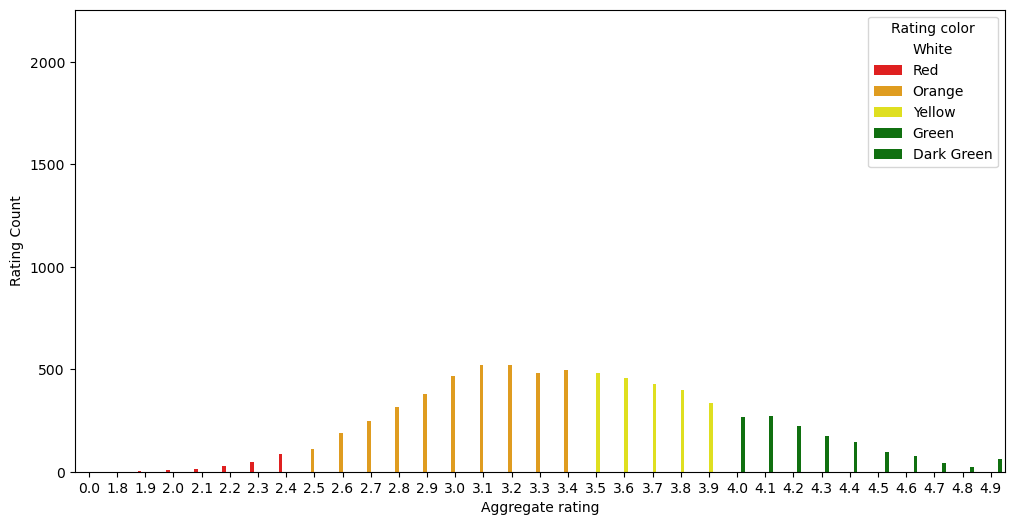

In [81]:
sb.barplot(x="Aggregate rating",y="Rating Count", hue="Rating color", data=rating_df, palette=['White','Red','Orange','Yellow','Green','Green'] )